# First code 

In [1]:
%load_ext autoreload
%autoreload 2

https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
time = 1 # in seconds
df['time'] = df.index * time
df.rename(columns={'0': 'V'}, inplace=True)

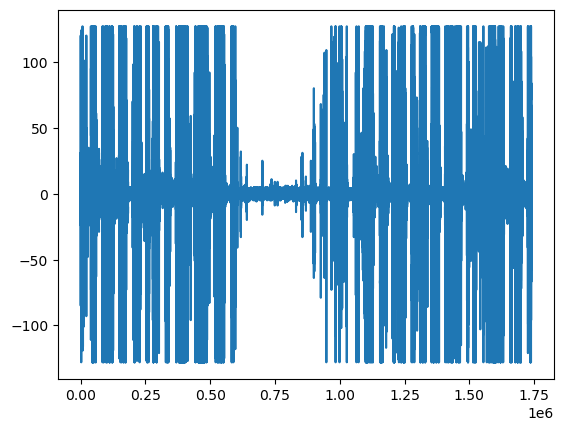

In [4]:
time = 1 # in seconds
plt.plot(df['time'], df['V'])

## Fourier transform

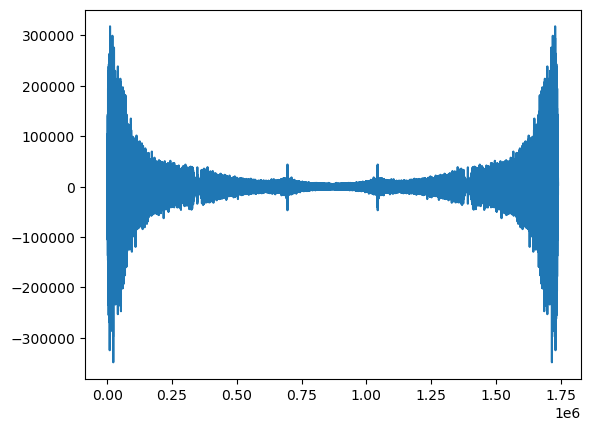

In [5]:
import scipy as sp 
import scipy.fftpack
df_f = df.copy()
df_f['V'] = sp.fftpack.fft(df_f['V'])
plt.plot(df_f['time'], df_f['V'])

### power spectral density (PSD)

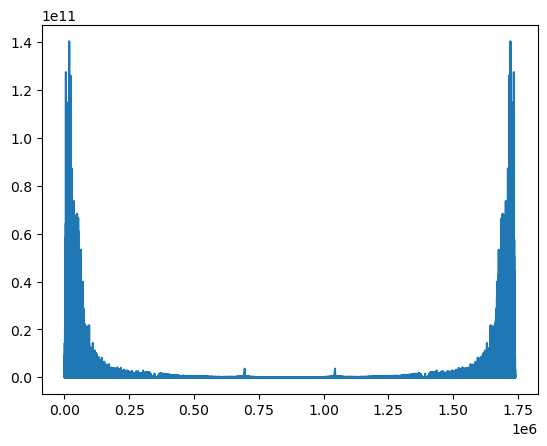

In [6]:
import numpy as np 
df_f["psd"] = np.abs(df_f["V"]) ** 2
plt.plot(df_f['time'], df_f['psd'])

array([[<AxesSubplot:title={'center':'psd'}>]], dtype=object)

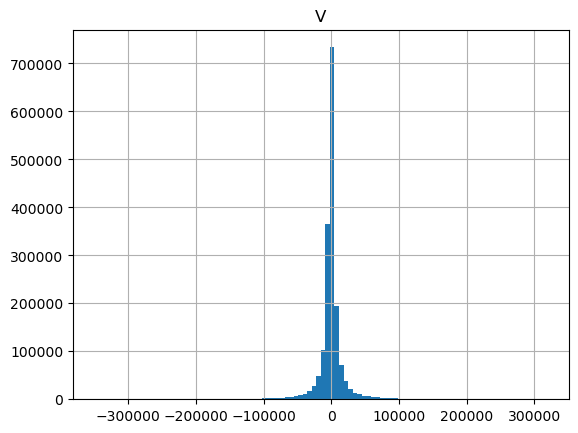

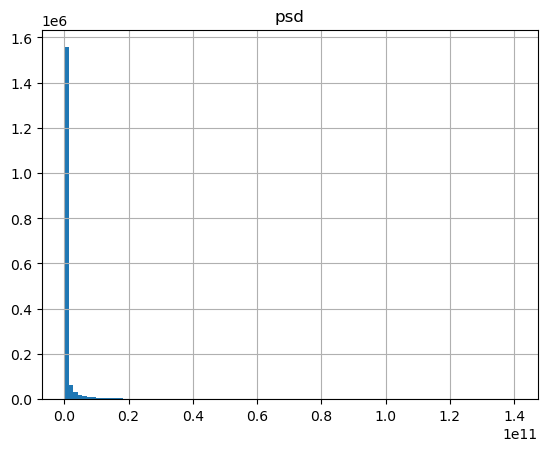

In [7]:
df_f.hist(column='V', bins=100)
df_f.hist(column='psd', bins=100)

Text(0.5, 1.0, 'Frequency domain with fourier transform')

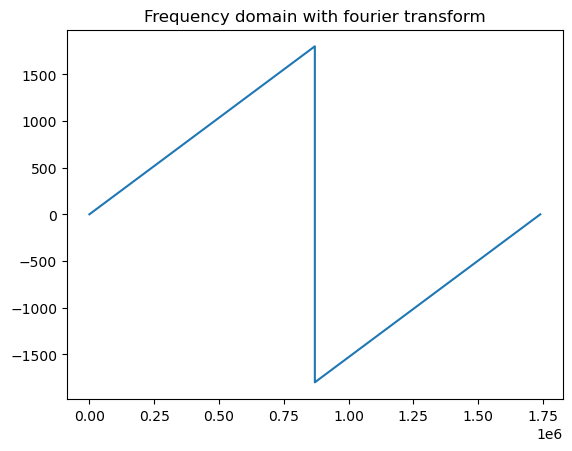

In [8]:
df_f["fftfreq"] = sp.fftpack.fftfreq(df_f.shape[0], 1. / (60*60))
plt.plot(df_f['time'], df_f['fftfreq'])
plt.title('Frequency domain with fourier transform')